In [1]:
%matplotlib inline

In [2]:
from scipy import fftpack, signal
from skimage import io, transform, util
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
import cv2

ImportError: No module named cv2

In [53]:
help(cv2.detectMultiScale)

AttributeError: 'module' object has no attribute 'detectMultiScale'

/ext/sage/sage-8.0/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(617, 481, 3)


/ext/sage/sage-8.0/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


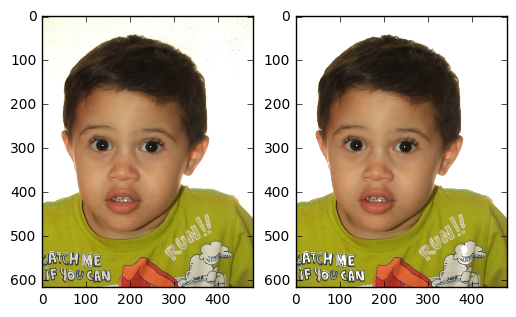

In [4]:
img = io.imread("example.png")[:,:,:3]

img = transform.rotate(img, 90, resize=True)
plt.imshow(img)
img = transform.resize(img, (617, 481))
print img.shape
imga = img.mean(2)
mask = np.zeros(imga.shape, dtype = "uint8")
mask[imga > 0.8] = 255
mask = 1.0-mask
imgDst = np.ones(imga.shape + (3,), dtype = "float64")
imgDst[:,:,0][imga < 0.8] = img[:,:,0][imga < 0.8]
imgDst[:,:,1][imga < 0.8] = img[:,:,1][imga < 0.8]
imgDst[:,:,2][imga < 0.8] = img[:,:,2][imga < 0.8]
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(imgDst)
img = imgDst

<type 'numpy.ndarray'>


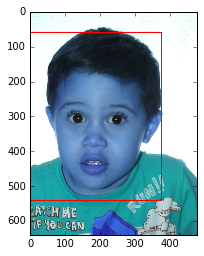

In [88]:
img = cv2.imread("example.png")
if img.shape[0] < img.shape[1]:
    img = cv2.flip(cv2.transpose(img), 0)
faceClass = cv2.CascadeClassifier()
faceClass.load("haarcascade_frontalface_alt.xml")
imgGray = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
faces = faceClass.detectMultiScale(imgGray, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
center = (faces[0][0]+faces[0][2]/2, faces[0][3])
minEdge = min(center[0], center[1])
cv2.rectangle(img, (center[0]-minEdge, int(center[1]-minEdge*1.28)), (center[0]+minEdge, int(center[1]+minEdge*1.28)), (255, 0, 0), 2)
plt.imshow(img)
print type(img)

(617, 481, 3)


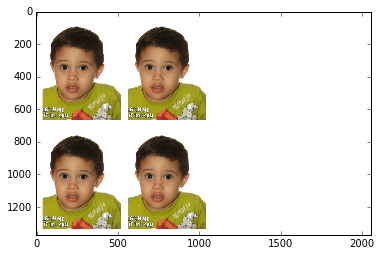

In [11]:
print img.shape
result = np.ones((1371, 2057 , 3))
x = 0
y = 0
x += 50
y += 40
result[x:x+img.shape[0],y:y+img.shape[1],:] = img
y += img.shape[1] + 40
result[x:x+img.shape[0],y:y+img.shape[1],:] = img
y -= img.shape[1] + 40
x += img.shape[0] + 50
result[x:x+img.shape[0],y:y+img.shape[1],:] = img
y += img.shape[1] + 40
result[x:x+img.shape[0],y:y+img.shape[1],:] = img
plt.imshow(result)